In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, top_k_accuracy_score

In [2]:
df_train = pd.read_csv('../data/train_pred.csv', index_col=0)
df_validation = pd.read_csv('../data/validation_pred.csv', index_col=0)
df_test = pd.read_csv('../data/test_pred.csv', index_col=0)

print(df_train.shape)
print(df_validation.shape)
print(df_test.shape)

(912, 10)
(228, 10)
(300, 10)


In [3]:
df_train = df_train.reindex(columns=sorted(df_train.columns))
df_validation = df_validation.reindex(columns=sorted(df_validation.columns))
df_test = df_test.reindex(columns=sorted(df_test.columns))

class_names = {emotion: idx for idx, emotion in enumerate(sorted(col[5:] for col in df_train.columns if col.lower() not in ['target', 'path']))}
print(class_names)

y_train = df_train['target'].apply(lambda gt: class_names[gt]).values
y_test = df_test['target'].apply(lambda gt: class_names[gt]).values

y_train_pred = df_train.drop(columns=['target', 'path']).values
y_test_pred = df_test.drop(columns=['target', 'path']).values

y_train_pred_argmax = np.argmax(y_train_pred, axis=-1)
y_test_pred_argmax = np.argmax(y_test_pred, axis=-1)

{'angry': 0, 'calm': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'ps': 6, 'sad': 7}


In [4]:
normalize = 'pred'  # sum over predictions is one
cm_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred_argmax, normalize=normalize)
cm_test = confusion_matrix(y_true=y_test, y_pred=y_test_pred_argmax, normalize=normalize)

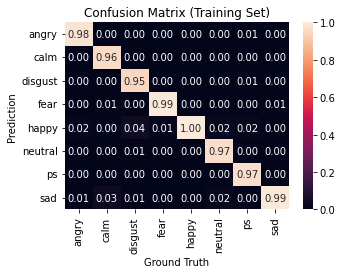

In [5]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0.25,0.25,0.65,0.65])
plt.title('Confusion Matrix (Training Set)')
sns.heatmap(cm_train, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.savefig('cm_train.png')

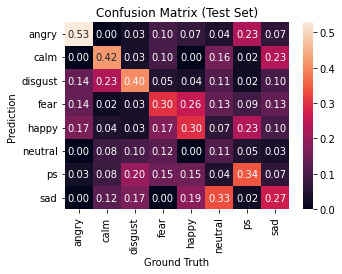

In [6]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0.25,0.25,0.65,0.65])
plt.title('Confusion Matrix (Test Set)')
sns.heatmap(cm_test, annot=True, fmt='.2f', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.savefig('cm_test.png')

In [7]:
df_top_k_accuracy = pd.DataFrame(
    data=[
        [
            k,
            top_k_accuracy_score(y_true=y_train, y_score=y_train_pred, k=k), 
            top_k_accuracy_score(y_true=y_test, y_score=y_test_pred, k=k), 
        ] 
        for k in range(1, 5)], 
    columns=['k', 'train', 'test'],
)
df_top_k_accuracy.to_csv('top_k_accuracy.csv', header=True, index=False, float_format='%.2f')

print(df_top_k_accuracy)

   k     train      test
0  1  0.974781  0.330000
1  2  1.000000  0.566667
2  3  1.000000  0.703333
3  4  1.000000  0.783333
